# Credit Card Churn Classifer

## About:
- In this project we will look at a dataset of bank information to try to predict who would a  be potential chruner for the bank





# Introduction
1. Introduce the project. What is the problem you are trying to solve? What questions are you trying to find answers to?
    - The problem we are trying to solve is to help banks with detecting who could be a churning customer. Having the ablity to know when someone will chrun a credit card or other finicaials products really helps with productivity and efficency.
    - We will classify a dataset from kaggle that has bank information from clients with a imbalance of 15 that we know are churn and the rest that are not.
    - Link:  

# Introduce the data
-  The information comes from kaggle and has a clean dataset of bank information.
- the data has a imbalance of 16.07 percent of people we know are churned.
- contains about 10,000 customers
- has a shape of 10127 rows and 21 columns
- link: https://www.kaggle.com/sakshigoyal7/credit-card-customers 

# Attributes
- CLIENTNUM  
    - clinet number                                                                                                                              
- Attrition_Flag   
    - Internal event if customer  account is closed then 1 else 0

- Customer_Age : 
    - age in years                                                                                                                           
- Gender:
    - m=male, F=female                                                                                                                                 
- Dependent_count= 
    - number of dependent                                                                                                                        
- Education_Level   :
    - graduate, high school, unknowned                                                                                                                     
- Marital_Status    : 
    - Married, Single, Divorced, Unknown
                                                                                                                     
- Income_Category  : 
    - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)                                                                                                                     
- Card_Category      :
    - Type of Card (Blue, Silver, Gold, Platinum                                                                                                                   
- Months_on_book          : 
    - Period of relationship with bank                                                                                                              
- Total_Relationship_Count : 
    - Total no. of products held by the customer                                                                                                              
- Months_Inactive_12_mon :

- Contacts_Count_12_mon        : 
    - No. of Contacts in the last 12 months                                                                                                         
- Credit_Limit   :
    - Credit Limit on the Credit Card                                                                                                                       
- Total_Revolving_Bal         :
    -  total revoling balance                                                                                                           
- Avg_Open_To_Buy        :
    - Open to Buy Credit Line (Average of last 12 months)                                                                                                               
- Total_Amt_Chng_Q4_Q1 : 
    - Change in Transaction Amount (Q4 over Q1)                                                                                                                   
- Total_Trans_Amt     : 
    - Total Transaction Amount (Last 12 months)                                                                                                                  
- Total_Trans_Ct     : 
    - Total Transaction Count (Last 12 months)                                                                                                                   
- Total_Ct_Chng_Q4_Q1       :
    -  Change in Transaction Count (Q4 over Q1)           
    
                                                                                        
- Avg_Utilization_Ratio
    - Average Card Utilization Ratio         



# Pre-processing the data
- Here we are scrubing the data and making data sets to offeset the imbalance of data


In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [28]:
#load data
firstDataframe=pd.read_csv("BankChurners.csv")

In [29]:
firstDataframe.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [30]:
# drop the client number and last 2 columns as they serve no purspose now

secondDataframe=firstDataframe.iloc[:,1:-2]

In [31]:
#show result of droped columns
secondDataframe.dtypes # nice

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [32]:
# Here we will get the amount of nulls in each columns
print(f"\nNull Values %:\n{secondDataframe.apply(lambda x: sum(x.isnull()) / len(secondDataframe))}")


Null Values %:
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64


In [33]:
#checks how many unkowns there are in our dataset
print(f"\nUnknown Values %:\n{secondDataframe.apply(lambda x: sum(x=='Unknown') / len(secondDataframe))}")


Unknown Values %:
Attrition_Flag              0.000000
Customer_Age                0.000000
Gender                      0.000000
Dependent_count             0.000000
Education_Level             0.149995
Marital_Status              0.073961
Income_Category             0.109805
Card_Category               0.000000
Months_on_book              0.000000
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      0.000000
Contacts_Count_12_mon       0.000000
Credit_Limit                0.000000
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             0.000000
Total_Amt_Chng_Q4_Q1        0.000000
Total_Trans_Amt             0.000000
Total_Trans_Ct              0.000000
Total_Ct_Chng_Q4_Q1         0.000000
Avg_Utilization_Ratio       0.000000
dtype: float64


- Since our data is imbalanced we can use smote algorithm to help with this
- smote helps use because it can create synthetic data using k nearest neigbors to supplement the imbalance.
- issues like oversampling and overfishing can occur but in practice oversampling has geneally out performed undersampling.



In [34]:
secondDataframe.shape

(10127, 20)

In [35]:
secondDataframe.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [36]:
# 
# list of features name that are int64, object, and float64
s = (secondDataframe.dtypes == 'object')
cat_cols = list(s[s].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

s = (secondDataframe.dtypes == 'float64')
float64_cols = list(s[s].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

s = (secondDataframe.dtypes == 'int64')
int64_cols = list(s[s].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")
del s # auto memory nerd stuff

6 Categorical features:
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

5 float64 features:
['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

9 int features:
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']


In [37]:
# converts objects to categories
secondDataframe[cat_cols] = secondDataframe[cat_cols].astype('category') 

In [38]:
secondDataframe.dtypes

Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

> here we got only the people who are not customers anymore just to sepeate the imbalance group to each self
-  now we need to decide our x and our y training datasets for smote processing
- before that to save some memory let change of of the datasets into somthing less intensive on memory
- first lets categorize if the data has ordinal categorical data and nomial categorical data. 

<AxesSubplot:>

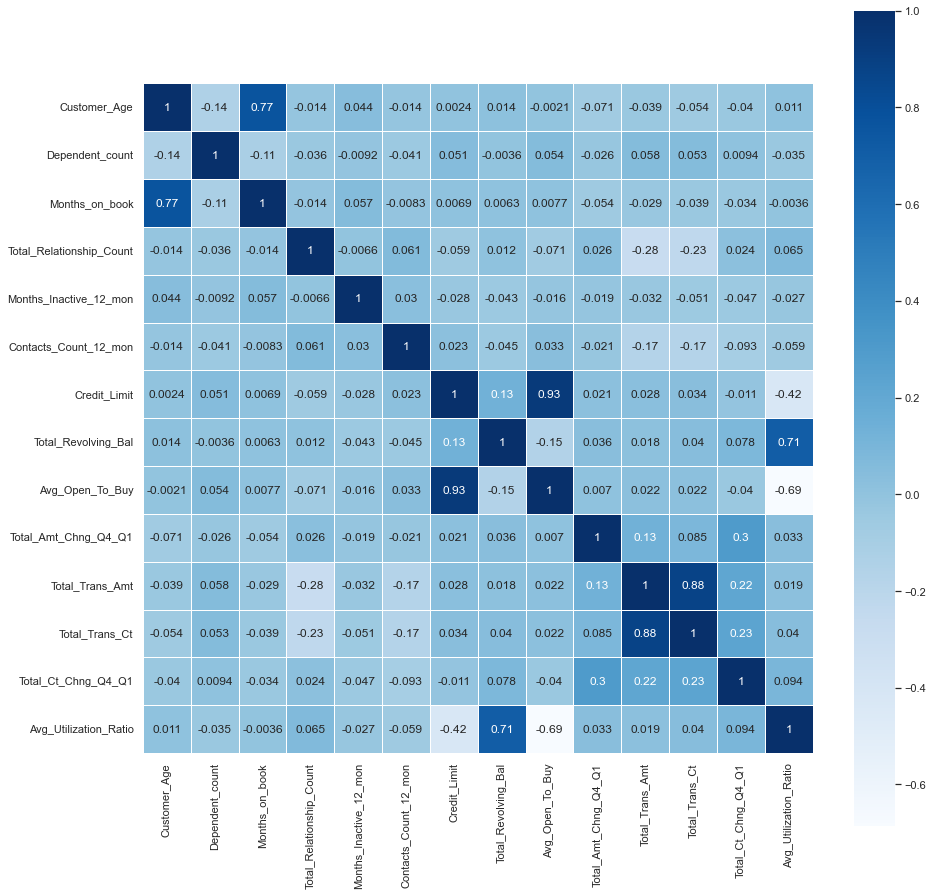

In [59]:
# let see how the confusion matrix looks
corrmat=secondDataframe.corr(method='spearman')
# fig, ax,ay= plt.subplot(12,10)
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(corrmat,annot=True,square=True,linewidths=.5, cmap="Blues")


- There is still more work to be done on the data but we can at least look at the information above and see that there are some correlations with daome daa like credit limit and avg open to buy

In [40]:
# Converts the data to be either 1 or 0
secondDataframe["Attrition_Flag"] = secondDataframe["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})
cat_cols=list(secondDataframe.select_dtypes("object"))

In [41]:
secondDataframe.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [42]:
#makes dummy variables , creates ranges for each column and give them numbers if their implace 
for col in cat_cols:
    dummy_cols = pd.get_dummies(secondDataframe[col], drop_first=True, prefix=col)
    secondDataframe = pd.concat([secondDataframe,dummy_cols],axis=1)
    secondDataframe.drop(columns=col, inplace=True)  

In [43]:
secondDataframe.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [44]:
#seeting up our data to be trained
y=secondDataframe.pop("Attrition_Flag")

X=secondDataframe

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=69)


In [45]:
#noramlizing the data
from sklearn.preprocessing import MinMaxScaler
req_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio']

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train[req_cols])

X_test = scaler.transform(X_test[req_cols])

In [46]:
#imports smote to fix the imbalance issues with the data
from imblearn.over_sampling import SMOTE
smoteModel=SMOTE(random_state=69,sampling_strategy = 1.0)
X_train,y_train=smoteModel.fit_resample(X_train,y_train)

- with the help of other peoples code we managed to pre preprocess the data
- now we are going to try some algorithms to help with classifying if someone will churn or not.
- We will use random forest trees to help with classifcation and xgboost.


In [57]:
# import and set up random foret for use
from sklearn.ensemble import RandomForestClassifier
randomForestModel=RandomForestClassifier(max_depth=10,random_state=0)
randomForestModel.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [58]:
#test our random forest model against our test datasets
randomForestModel.score(X_test,y_test)

0.9447186574531096

In [49]:
# imports scikit learn metrics to measuere our model perfomance when modeling. 
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
print(classification_report(y_test,randomForestModel.predict(X_test)))  #creates classifcation report

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1708
           1       0.63      0.88      0.73       318

    accuracy                           0.90      2026
   macro avg       0.80      0.89      0.83      2026
weighted avg       0.92      0.90      0.91      2026



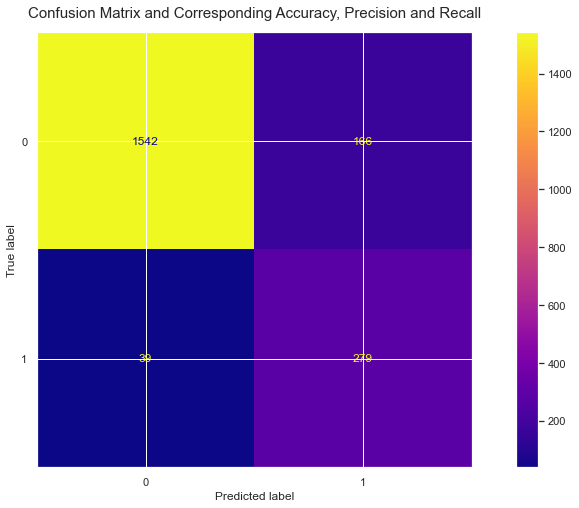

In [52]:
# creates a confusion matrix
confusionMatrix=confusion_matrix(y_true=y_test, y_pred=randomForestModel.predict(X_test))

TP = confusionMatrix[0][0]
FN = confusionMatrix[0][1]
FP = confusionMatrix[1][0]
TN = confusionMatrix[1][1]


fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Confusion Matrix and Corresponding Accuracy, Precision and Recall", size=15, pad=15)
plot_confusion_matrix(randomForestModel, X_test, y_test, ax=ax, cmap='plasma')
plt.show()

- this is a confusion matrix 
- 0:0 true postive
- 0:1 false negative
- 1:0 false postive
- 1:1 true negeative

# Conclusion
- In the begginning we asked the question if we can  actually predict if someone will chrun from a bank?     
- Upon looking at the information provided, we can say that the strategy can be possible with  with some the metrics we have collected in our tests:
    - in our testing we found  that when testing our model using random forest using a depth of 10 we got a 94 percent accuracy on our test dataset.
    - Inspecting further precsion recall and f1 for our non churn dectection is very high but our numbers for our churners is far less reliable.
    - This can be improved by using a different algorithm, data manipuation techniques or better parameter fine tunning
    - Our confusion matrix points out that in our dataset of 2026 rows (find words later), we found that our model has a accuracy of 90 percent for people who are not going to churn and accuracy  85 percent when detecting true negatives or potential churners.

